In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from pandas import Series

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Save references to each table
Mmt = Base.classes.measurement
Stn = Base.classes.station

In [9]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

maxdate = session.query(Mmt.date).order_by(Mmt.date.desc()).first()
maxdate

('2017-08-23')

In [13]:
mindate = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [14]:
sel = [Mmt.prcp,Mmt.date]
Precip = session.query(*sel).filter(Mmt.date > mindate).all()

df = pd.DataFrame(Precip, columns=["Precipitation", "Date"])

In [15]:
df = df.set_index("Date")
df.head()

,Precipitation
Date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


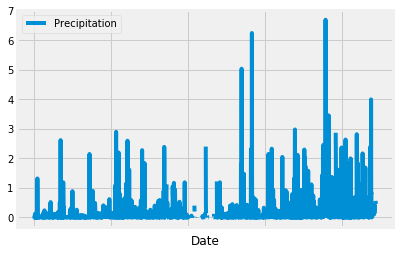

In [16]:
df.plot()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
# Design a query to show how many stations are available in this dataset?
station_count =session.query(Mmt.station,func.count(Mmt.station)).group_by(Mmt.station).order_by(func.count(Mmt.station).desc()).all()
len(station_count)

9

In [19]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
sel = [func.min(Mmt.tobs),func.max(Mmt.tobs),func.avg(Mmt.tobs)]
Temps = session.query(*sel).\
    filter(Mmt.date > mindate).\
    filter(Mmt.station == 'USC00519281').all()
Temps



[(59.0, 83.0, 73.0968660968661)]

In [21]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Temp_obs =session.query(Mmt.station,func.count(Mmt.tobs)).group_by(Mmt.station).order_by(func.count(Mmt.tobs).desc()).all()
Temp_obs

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
Temps2 = session.query(Mmt.tobs).\
    filter(Mmt.date > mindate).\
    filter(Mmt.station == 'USC00519281').order_by(Mmt.tobs).all()
Temps2

[(59.0),
 (59.0),
 (59.0),
 (60.0),
 (60.0),
 (61.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (62.0),
 (63.0),
 (63.0),
 (63.0),
 (63.0),
 (64.0),
 (64.0),
 (64.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (65.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (66.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (67.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (68.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (69.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (70.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 (71.0),
 

In [23]:
Temps2lst=[]
Temps2lst=[result[0] for result in Temps2[:-1]]
Temps2lst

[59.0,
 59.0,
 59.0,
 60.0,
 60.0,
 61.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 62.0,
 63.0,
 63.0,
 63.0,
 63.0,
 64.0,
 64.0,
 64.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 65.0,
 66.0,
 66.0,
 66.0,
 66.0,
 66.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 67.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 68.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 69.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 70.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 71.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 72.0,
 73.0,
 73.0,
 73.0,
 73.0,

In [24]:
hist_data = pd.Series(Temps2lst)
hist_data.head()

0    59.0
1    59.0
2    59.0
3    60.0
4    60.0
dtype: float64

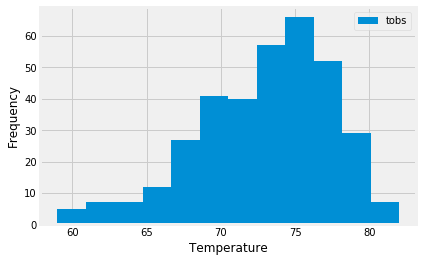

In [25]:
n_bins = 12
plt.hist(hist_data, bins=n_bins, histtype='bar', label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend(prop={'size': 10})
plt.show()

![precipitation](Images/station-histogram.png)

In [26]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
    
def calc_temps(start_date, end_date):

    stdt = func.strftime("%Y-%m-%d",start_date)
    enddt = func.strftime("%Y-%m-%d",end_date)  
       
    return session.query(func.min(Mmt.tobs), func.avg(Mmt.tobs), func.max(Mmt.tobs)).\
        filter(Mmt.date >= stdt).filter(Mmt.date <= enddt).all()


In [27]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


In [32]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
chartdata2=calc_temps('2012-02-28', '2012-03-05')

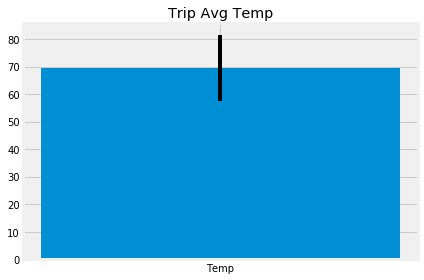

In [56]:
fig, ax = plt.subplots()
ax.bar('Temp',chartdata2[0][1],yerr=(chartdata2[0][2]-chartdata2[0][0]))
ax.set_title('Trip Avg Temp')
fig.tight_layout()
plt.show()

In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
sel2 = [Mmt.prcp,Mmt.date,stn.]
Precip = session.query(*sel2).filter(Mmt.date > mindate).all()

df = pd.DataFrame(Precip, columns=["Precipitation", "Date"])


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
